## Pandas Challenges

_**Data used:**_ `2013_movies.csv`

### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
 - [**Challenge 6**](#6)

In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import csv
import dateutil.parser

# For display
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### <a id='1'></a>Challenge 1:

In [3]:
df = pd.read_csv("../2013_movies.csv")
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


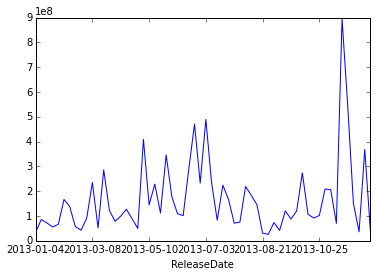

In [4]:
df["ReleaseDate"] = df["ReleaseDate"].apply(lambda x: x.split()[0])
by_release_date = df.groupby("ReleaseDate")
to_plot = by_release_date["DomesticTotalGross"].sum()
to_plot.plot()

### <a id='2'></a>Challenge 2:

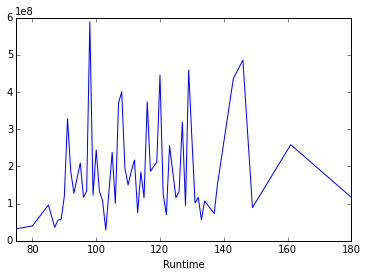

In [5]:
by_release_date = df.groupby("Runtime")
to_plot = by_release_date["DomesticTotalGross"].sum()
to_plot.plot()

### <a id='3'></a>Challenge 3:

In [6]:
by_rating = df.groupby("Rating")
by_rating[["Runtime", "DomesticTotalGross"]].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


### <a id='4'></a>Challenge 4:

/Users/seanosier/anaconda/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


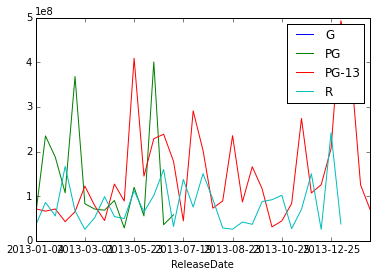

In [7]:
ratings = []
for rating, data in by_rating:
    by_release_date = data.groupby("ReleaseDate")
    to_plot = by_release_date["DomesticTotalGross"].sum()
    to_plot.plot()
    plt.legend(rating)
    ratings.append(rating)

plt.legend(ratings)

*Note: Only one point for "G" rating so it is hard to see*

### <a id='5'></a>Challenge 5:

In [8]:
by_director = df.groupby("Director")
by_director["DomesticTotalGross"].mean().order(ascending=False)[:1]

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

_**Francis Lawrence**_ has the highest gross per movie in this data set.

### <a id='6'></a>Challenge 6:

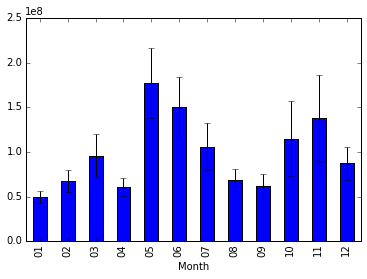

In [12]:
df["Month"] = df["ReleaseDate"].apply(lambda x: x.split("-")[1])
by_month = df.groupby("Month")
to_plot = by_month["DomesticTotalGross"].mean()
errors = by_month["DomesticTotalGross"].sem()
to_plot.plot(yerr=errors, kind="bar")